In [6]:
import pickle

with open('/home/maria/LuckyMouse4/data/visp_significant_neuron_weights.pkl', 'rb') as f:
    data = pickle.load(f)


Total weight vectors: 166200 (from 831 neurons)


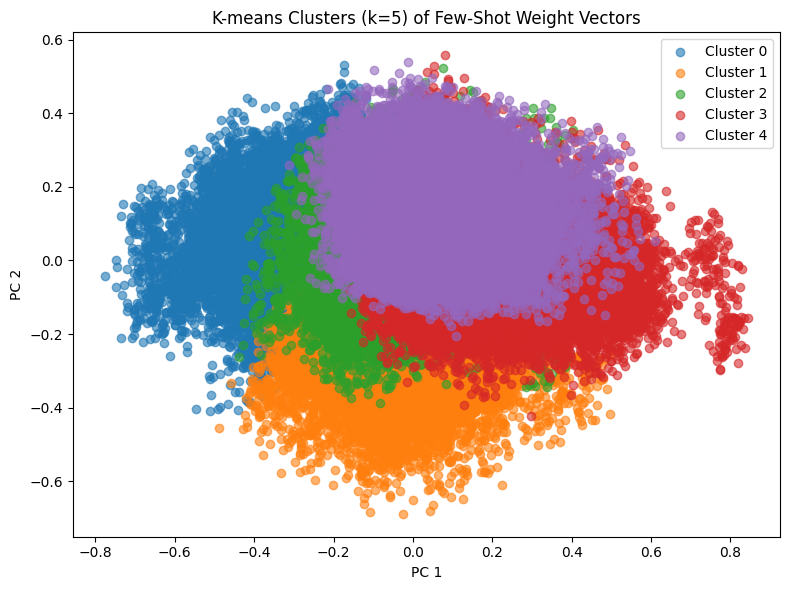

In [17]:
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ─── Load Dictionary of Weight Matrices ───────────────────────────────────────
with open('/home/maria/LuckyMouse4/data/visp_significant_neuron_weights.pkl', 'rb') as f:
    data = pickle.load(f)  # Dict: neuron_idx → (n_tasks, D) weight matrix

# ─── Stack All Weight Vectors into a Single Matrix ────────────────────────────
all_weights = []
neuron_ids = []

for neuron_id, matrix in data.items():
    all_weights.append(matrix)
    neuron_ids.extend([neuron_id] * len(matrix))

X = np.vstack(all_weights)            # Shape: (n_total_tasks, D)
neuron_ids = np.array(neuron_ids)    # Shape: (n_total_tasks,)

print(f"Total weight vectors: {X.shape[0]} (from {len(data)} neurons)")

# ─── Run K-Means Clustering ──────────────────────────────────────────────────
k = 5  # you can change this
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

# ─── Visualize in 2D with PCA ────────────────────────────────────────────────
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.6)
plt.title(f'K-means Clusters (k={k}) of Few-Shot Weight Vectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()


/home/maria/LuckyMouse4/.spherecluster/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/home/maria/LuckyMouse4/.spherecluster/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/maria/LuckyMouse4/.spherecluster/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `fl

Total weight vectors: 166200 (from 831 neurons)


/home/maria/LuckyMouse4/.spherecluster/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/maria/LuckyMouse4/.spherecluster/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/maria/Luck

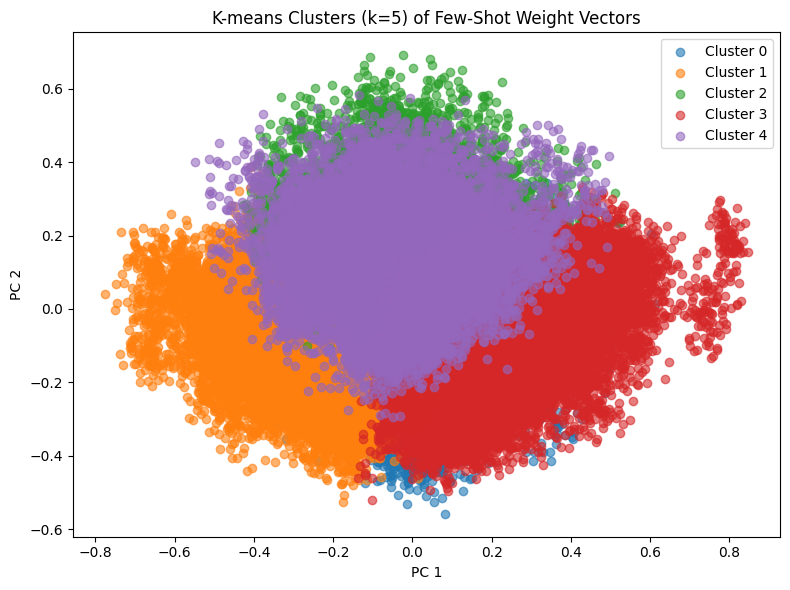

In [1]:
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from spherecluster import SphericalKMeans

# ─── Load Dictionary of Weight Matrices ───────────────────────────────────────
with open('/home/maria/LuckyMouse4/data/visp_significant_neuron_weights.pkl', 'rb') as f:
    data = pickle.load(f)  # Dict: neuron_idx → (n_tasks, D) weight matrix

# ─── Stack All Weight Vectors into a Single Matrix ────────────────────────────
all_weights = []
neuron_ids = []

for neuron_id, matrix in data.items():
    all_weights.append(matrix)
    neuron_ids.extend([neuron_id] * len(matrix))

X = np.vstack(all_weights)            # Shape: (n_total_tasks, D)
neuron_ids = np.array(neuron_ids)    # Shape: (n_total_tasks,)

print(f"Total weight vectors: {X.shape[0]} (from {len(data)} neurons)")

# ─── Run K-Means Clustering ──────────────────────────────────────────────────
k = 5  # you can change this
kmeans = SphericalKMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X, sample_weight=None)

# ─── Visualize in 2D with PCA ────────────────────────────────────────────────
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.6)
plt.title(f'K-means Clusters (k={k}) of Few-Shot Weight Vectors')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
kmeans.cluster_centers_.shape

(5, 1000)

In [4]:
np.save('cluster_centers.npy',kmeans.cluster_centers_)